In [1]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

In [2]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

le.classes_

array(['B', 'M'], dtype=object)

In [3]:
le.transform(["B", "M"])

array([0, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

print("Test Accuracy: %.3f" % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


In [6]:
from sklearn import set_config

set_config(display='diagram')

In [7]:
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [9]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f"Fold: {k+1}, Class Distribution: {np.bincount(y_train[train])}, Accuracy: {score}")

Fold: 1, Class Distribution: [256 153], Accuracy: 0.9347826086956522
Fold: 2, Class Distribution: [256 153], Accuracy: 0.9347826086956522
Fold: 3, Class Distribution: [256 153], Accuracy: 0.9565217391304348
Fold: 4, Class Distribution: [256 153], Accuracy: 0.9565217391304348
Fold: 5, Class Distribution: [256 153], Accuracy: 0.9347826086956522
Fold: 6, Class Distribution: [257 153], Accuracy: 0.9555555555555556
Fold: 7, Class Distribution: [257 153], Accuracy: 0.9777777777777777
Fold: 8, Class Distribution: [257 153], Accuracy: 0.9333333333333333
Fold: 9, Class Distribution: [257 153], Accuracy: 0.9555555555555556
Fold: 10, Class Distribution: [257 153], Accuracy: 0.9555555555555556


In [10]:
print(f"CV Accuracy: {np.mean(scores)} +/- {np.std(scores)}")

CV Accuracy: 0.9495169082125603 +/- 0.013854294239660376


In [11]:
from sklearn.model_selection import cross_val_score

In [13]:
scores = cross_val_score(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=-1
)

print(f"CV Score: {scores}")
print(f"CV Accuracy: {np.mean(scores):.2f} +/- {np.std(scores):.3f}")

CV Score: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV Accuracy: 0.95 +/- 0.014


In [15]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    scoring=['accuracy'],
    cv=10,
    n_jobs=-1,
)

print(f"CV Score: {scores}")
print(f"CV Accuracy: {np.mean(scores['test_accuracy']):.2f} +/- {np.std(scores['test_accuracy']):.3f}")

CV Score: {'fit_time': array([0.04315567, 0.02490711, 0.02122855, 0.01124072, 0.02552676,
       0.01099467, 0.01310682, 0.01034784, 0.01091671, 0.00810504]), 'score_time': array([0.00816035, 0.00824571, 0.00103569, 0.0009563 , 0.00095463,
       0.00091529, 0.00114274, 0.00084734, 0.00088143, 0.00057817]), 'test_accuracy': array([0.93478261, 0.93478261, 0.95652174, 0.95652174, 0.93478261,
       0.95555556, 0.97777778, 0.93333333, 0.95555556, 0.95555556])}
CV Accuracy: 0.95 +/- 0.014


In [16]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=-1,
)

preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [18]:
preds = cross_val_predict(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    cv=10,
    method='predict_proba',
    n_jobs=-1,
)

preds[:10]

array([[9.93982352e-01, 6.01764759e-03],
       [7.64328337e-01, 2.35671663e-01],
       [9.72683946e-01, 2.73160539e-02],
       [8.41658121e-01, 1.58341879e-01],
       [9.97144940e-01, 2.85506043e-03],
       [9.99803660e-01, 1.96339882e-04],
       [9.99324159e-01, 6.75840609e-04],
       [2.12145074e-06, 9.99997879e-01],
       [1.28668437e-01, 8.71331563e-01],
       [7.76260670e-04, 9.99223739e-01]])

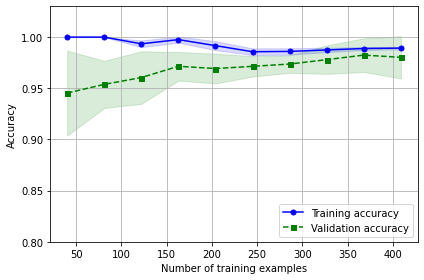

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2',
                       random_state=1,
                       max_iter=10000)
)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
    train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy'
)

plt.fill_between(
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue'
)

plt.plot(
    train_sizes, test_mean,
    color='green', linestyle='--', marker='s',
    markersize=5, label='Validation accuracy'
)

plt.fill_between(
    train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green'
)

plt.grid()
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()